# US Baby Names 1880–2010

### The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. But we considering here from the year 1880-2010

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',names=['name', 'sex', 'births'])

In [60]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [61]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Since the dataset is split into files by year, one of the first things to do is to assemble
all of the data into a single DataFrame and further to add a year field. You can do this
using pandas.concat:

In [62]:
years = range(1880, 2011)

In [63]:
pieces = []
columns = ['name', 'sex', 'births']

In [64]:
for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

In [65]:
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [67]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [68]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [69]:
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


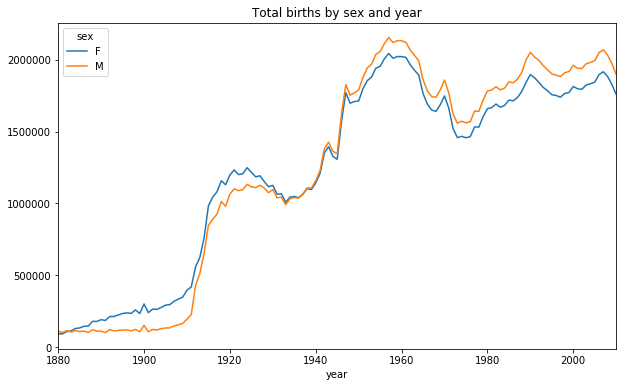

In [70]:
total_births.plot(title='Total births by sex and year',figsize=(10,6))

#### Next, let’s insert a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex, then add the new column to each group:

In [71]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

In [72]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [74]:
names.tail()

,name,sex,births,year,prop
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003
1690783,Zzyzx,M,5,2010,0.000003


When performing a group operation like this, it’s often valuable to do a sanity check,
like verifying that the prop column sums to 1 within all the groups:

In [76]:
#names.groupby(['year', 'sex']).prop.sum()

### To extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination.

In [77]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [78]:
grouped = names.groupby(['year', 'sex'])

In [79]:
top1000 = grouped.apply(get_top1000)

In [80]:
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [82]:
top1000.tail()

,name,sex,births,year,prop
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102
261876,Maxton,M,193,2010,0.000102


### We’ll use this Top 1,000 dataset in the following investigations into the data.

# Analyzing Naming Trends

### With the full dataset and Top 1,000 dataset in hand, we can start analyzing various naming trends of interest. Splitting the Top 1,000 names into the boy and girl portions is easy to do first:

In [83]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [87]:
boys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130997 entries, 942 to 261876
Data columns (total 5 columns):
name      130997 non-null object
sex       130997 non-null object
births    130997 non-null int64
year      130997 non-null int64
prop      130997 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.0+ MB


Simple time series, like the number of Johns or Marys for each year, can be plotted
but require a bit of munging to be more useful. Let’s form a pivot table of the total
number of births by year and name:

In [88]:
total_births = top1000.pivot_table('births', index='year',columns='name',aggfunc=sum)

In [89]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [90]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca79d15128>,
      dtype=object)

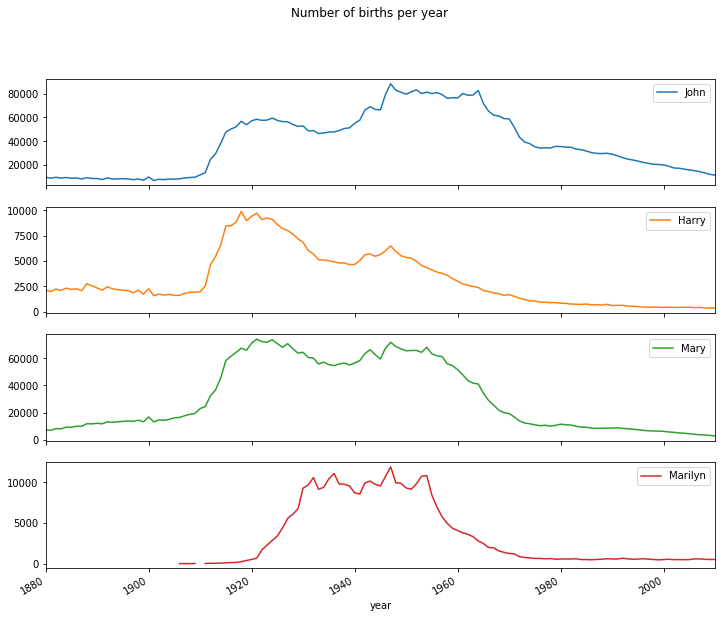

In [91]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

## Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing common
names for their children. This hypothesis can be explored and confirmed in the data.
One measure is the proportion of births represented by the top 1,000 most popular
names.

In [44]:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)

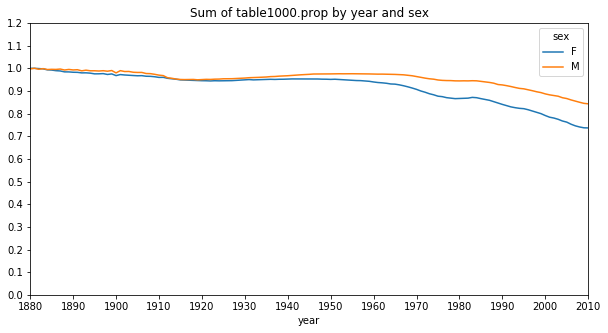

In [46]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10), figsize=(10,5))

You can see that, indeed, there appears to be increasing name diversity (decreasing total proportion in the top 1,000). 